# SP Data Mining Assignment 1 Semester 2 
# Build a decision tree predictor for the C-section dataset
# Note : This assignment was originally done using Knime Analytics

[1] Read and clean data

In [128]:
from scipy.io import arff
import numpy as np
import pandas as pd
import os

##Read arff file into buffer
fname1=(os.path.abspath('caesarian.csv.arff'))

data,meta = arff.loadarff(fname1)

print('The variables in the dataset are : ', data.dtype.names)

data = data.astype([('Age', '=i8'), ('Delivery number', '=i8'), ('Delivery time', '=i8'), ('Blood of Pressure', '=i8'),
('Heart Problem', '=i8'), ('Caesarian', '=i8')])

df = pd.DataFrame(data)
print('The dataset has', df.shape, 'rows x columns')
df.head()

The variables in the dataset are :  ('Age', 'Delivery number', 'Delivery time', 'Blood of Pressure', 'Heart Problem', 'Caesarian')
The dataset has (80, 6) rows x columns


,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [45]:
#Create sets of dictionaries for all categorical columns
Delivery_num_dict={1:'Immediate threat to life', 2: 'Maternal/fetal compromise, not life threatening',
              3:'No maternal/fetal compromise, early delivery required', 4:'Elective delivery'}

Delivery_time_dict = {0:'Timely', 1:'Premature', 2:'Latecomer'}
Blood_pressure_dict = {0:'Low', 1:'Normal', 2:'High'}
Heart_prob_dict = {0:'Apt', 1:'Inept'}
Caesarian_dict = {0:'No', 1: 'Yes'}

df1=df.replace({'Delivery number': Delivery_num_dict, 'Delivery time': Delivery_time_dict, 'Blood of Pressure': Blood_pressure_dict,
           'Heart Problem': Heart_prob_dict, 'Caesarian': Caesarian_dict }, inplace = False)

#View of final dataset after cleaning
df1.head(5)

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,Immediate threat to life,Timely,High,Apt,No
1,26,"Maternal/fetal compromise, not life threatening",Timely,Normal,Apt,Yes
2,26,"Maternal/fetal compromise, not life threatening",Premature,Normal,Apt,No
3,28,Immediate threat to life,Timely,High,Apt,No
4,22,"Maternal/fetal compromise, not life threatening",Timely,Normal,Apt,Yes


In [125]:
#In order to use the SKlearn decision tree algorithm later, we need a dataset that remains as integer (label encoded)
#so that we can perform one-hot encoding for nominal variable
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(categories='auto')
dn_arr = ohe.fit_transform(df['Delivery number'].values.reshape(-1,1)).toarray()
dt_arr = ohe.fit_transform(df['Delivery time'].values.reshape(-1,1)).toarray()

dn_df = pd.DataFrame(dn_arr, columns = ["DN_"+str(int(i)) for i in range(dn_arr.shape[1])])
dt_df = pd.DataFrame(dt_arr, columns = ["DT_"+str(int(i)) for i in range(dt_arr.shape[1])])

df2 = pd.concat([df, dn_df, dt_df], axis=1)
df2.drop(['Delivery number', 'Delivery time'], axis=1, inplace=True)

#Reorder the columns to move target column to end
cols=list(df2.columns)
temp = cols[3]
cols.pop(3)
cols.append(temp)
df2 = df2[cols]

df2.head(5)


,Age,Blood of Pressure,Heart Problem,DN_0,DN_1,DN_2,DN_3,DT_0,DT_1,DT_2,Caesarian
0,22,2,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,26,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,26,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,28,2,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,22,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


[2] Data Visualization

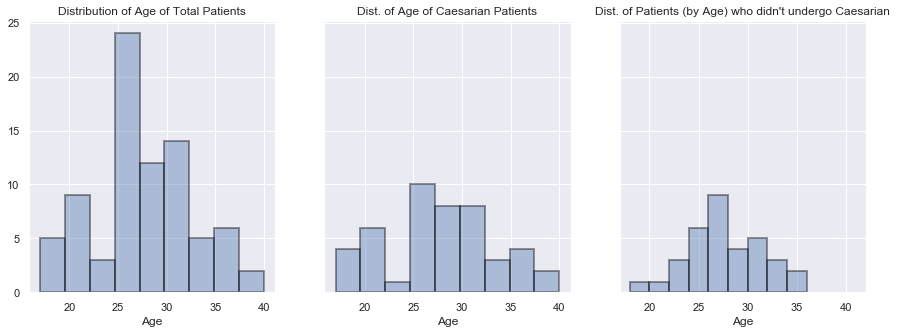

In [78]:
undergo_Caesarean=df1['Caesarian']=='Yes'
did_not_undergo_Caesarean=df1['Caesarian']=='No'

Age_undergoC=df1[undergo_Caesarean]
Age_did_not_undergo_Caesarean = df1[did_not_undergo_Caesarean]

#Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

#Total age distribution in the dataset
fig1, [ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3, figsize = (15,5), sharey=True, sharex = False)
sns.distplot(df1['Age'], bins=9, kde=False, hist_kws=dict(edgecolor="black", linewidth=2), ax=ax1)
ax1.set_title('Distribution of Age of Total Patients')

sns.distplot(Age_undergoC['Age'], bins=9, kde=False, hist_kws=dict(edgecolor="black", linewidth=2),ax=ax2)
ax2.set_title('Dist. of Age of Caesarian Patients')

sns.distplot(Age_did_not_undergo_Caesarean['Age'], bins=9, kde=False, hist_kws=dict(edgecolor="black", linewidth=2), ax=ax3)
ax3.set_title('Dist. of Patients (by Age) who didn\'t undergo Caesarian')
ax3.set_xlim(17,42);


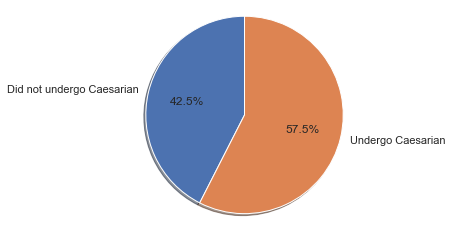

In [79]:
grouped_df=df1.groupby(['Caesarian']).count()

labels = 'Did not undergo Caesarian', 'Undergo Caesarian'
sizes= [grouped_df.values[0][1], grouped_df.values[1][1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.


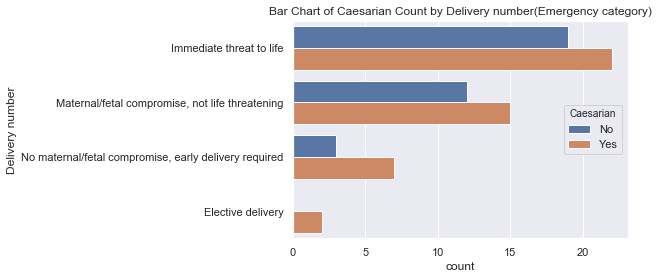

In [80]:
sns.set(style="darkgrid")
g = sns.countplot(y=df1['Delivery number'], hue = df1['Caesarian'], data=df1)
g.set_title('Bar Chart of Caesarian Count by Delivery number(Emergency category)');

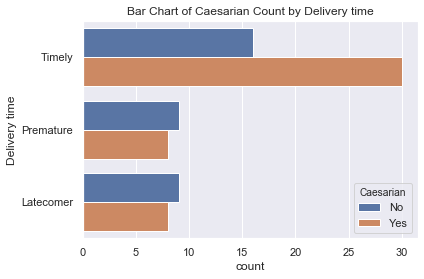

In [81]:
g = sns.countplot(y=df1['Delivery time'], hue = df1['Caesarian'], data=df1)
g.set_title('Bar Chart of Caesarian Count by Delivery time');

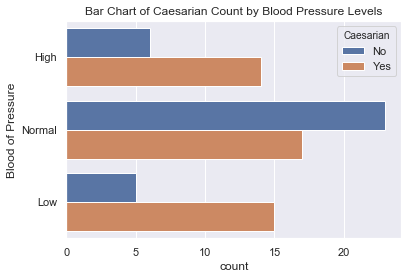

In [82]:
g = sns.countplot(y=df1['Blood of Pressure'], hue = df1['Caesarian'], data=df1)
g.set_title('Bar Chart of Caesarian Count by Blood Pressure Levels');

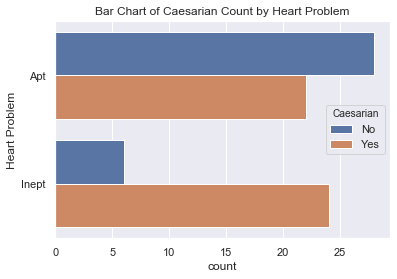

In [83]:
g = sns.countplot(y=df1['Heart Problem'], hue = df1['Caesarian'], data=df1)
g.set_title('Bar Chart of Caesarian Count by Heart Problem');

From the Histogram of distribution of patients by age, most patients are between 25 to 33. However the age group with highest count is 25 to 28. There doesn't seem to be any clear correlation between age and going or not going for C-section. 57.5% of the patients in this dataset underwent Caesarian. From the horizontal bar charts, all levels of emergencies have higher count of patients going for Caesarian. Timely deliveries have higher counts of patients going for Caesarian compared to premature and latecomer deliveries. Abnormal blood pressure patients and inept heart problem patients have higher count of patients that underwent Caesarian. 

[3]. Partition the data into train/test set and use the train set for validation

In [89]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.33, random_state=3, stratify=df2[['Caesarian']])

train = train.reset_index(drop=True)   #reset index here to avoid future problems
test= test.reset_index(drop=True)      #reset index to avoid future problems


[4]. Now, I want to do k-fold cross validation on train data

In [121]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X=train.iloc[:,:-1]
y= train.iloc[:,-1]
n_fold = 3

score_dict = {}

ms_leafs = np.arange(2, 25, 1)
kf = KFold(n_splits=n_fold, random_state=3) # Define the split - into n folds 
kf.get_n_splits(train)

for min_samples_leaf in ms_leafs:
    fold_acc = []
    for train_index, test_index in kf.split(train):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #Fit each folds of train data to tree for validation
        clf_gini=DecisionTreeClassifier(criterion = "gini", random_state = 3, max_depth=None, min_samples_leaf=min_samples_leaf)
        clf_gini.fit(X_train, y_train)
    
        y_pred=clf_gini.predict(X_test)
        fold_acc.append(np.mean(y_pred==y_test))

    avg_fold_score = np.sum(fold_acc)/n_fold
    score_dict[min_samples_leaf] = avg_fold_score
    
all_parameters = pd.DataFrame.from_dict(data = score_dict, orient = 'index', columns = ['Mean accuracy score'])
all_parameters.index.name = 'Min Samples Leaf'
print('Min samples leaf of best acc :', all_parameters.loc[all_parameters['Mean accuracy score'].idxmax()])
all_parameters

Min samples leaf of best acc : Mean accuracy score    0.603486
Name: 12, dtype: float64


,Mean accuracy score
Min Samples Leaf,
2,0.450980
3,0.508715
4,0.508715
5,0.508715
6,0.508715
7,0.471678
8,0.490196
9,0.490196
10,0.528322


In [122]:
#From hyper-parameter tuning for min samples leaf, best accuracy score is given by min sample leaf =12
#So we fit the test data on test set again to see the final performance
#First, split the test data into Predictor and Target
X_test1 = test.iloc[:,:-1]
y_test1 = test.iloc[:,-1]

clf_gini=DecisionTreeClassifier(criterion = "gini", random_state = 3, max_depth=None, min_samples_leaf=12)
clf_gini.fit(X, y)
    
y_pred_final=clf_gini.predict(X_test1)

df_confusion = pd.crosstab(y_pred_final, y_test1)
print(df_confusion)

Caesarian   0  1
row_0           
0          10  9
1           1  7


In [123]:
#Final_accuracy_score from the confusion matrix
print("Final Accuracy score:",accuracy_score(y_test1, y_pred_final))

Final Accuracy score: 0.6296296296296297


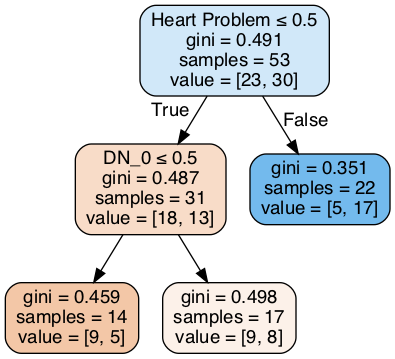

In [124]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  filled=True, rounded=True,special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())